In [ ]:
url = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/14_Modeling%20Car%20Insurance%20Claim%20Outcomes/car_insurance.csv"

# **Machine Learning**

In [ ]:
df_ml = pd.read_csv(url)
df_ml.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
# Iterate through columns and print the number of unique labels
for col in df_ml.columns:
    unique_labels = df_ml[col].unique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'id': [569520 750365 199901 ... 468409 903459 442696]
Number of unique labels in column 'age': [3 0 1 2]
Number of unique labels in column 'gender': [0 1]
Number of unique labels in column 'driving_experience': ['0-9y' '10-19y' '20-29y' '30y+']
Number of unique labels in column 'education': ['high school' 'none' 'university']
Number of unique labels in column 'income': ['upper class' 'poverty' 'working class' 'middle class']
Number of unique labels in column 'credit_score': [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
Number of unique labels in column 'vehicle_ownership': [1. 0.]
Number of unique labels in column 'vehicle_year': ['after 2015' 'before 2015']
Number of unique labels in column 'married': [0. 1.]
Number of unique labels in column 'children': [1. 0.]
Number of unique labels in column 'postal_code': [10238 32765 92101 21217]
Number of unique labels in column 'annual_mileage': [12000. 16000. 11000. 13000. 14000. 100

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import Binarizer


# Define the mappings for categorical columns
mappings = {
    'driving_experience': {'0-9y':0, '10-19y':1 ,  '20-29y':2, '30y+':3},
    'education': {'none':0, 'high school':1,  'university':2},
    'income': {'poverty':0, 'middle class':1, 'working class':2, 'upper class':3},
    'vehicle_year': {'before 2015':0, 'after 2015':1},
    'vehicle_type': {'sedan':0, 'sports car':1},
    'postal_code': {10238:1, 32765:2, 92101:3, 21217:4}
}

# Replace values based on mappings
df_ml.replace(mappings, inplace=True)

# Convert categorical columns to categorical data type
cat_cols = ['age', 'gender', 'driving_experience', 'education','income', 'vehicle_ownership',
            'vehicle_year', 'married', 'children', 'vehicle_type', 'postal_code']
df_ml[cat_cols] = df_ml[cat_cols].astype('category')

# Handling missing values in 'credit_score' and 'annual_mileage'
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like median as well
df_ml['credit_score'] = imputer.fit_transform(df_ml[['credit_score']])
df_ml['annual_mileage'] = imputer.fit_transform(df_ml[['annual_mileage']])

# --------------------------------Optional--------------------------------
# we can perform scaling or other transformations on numerical columns here
scaler = MinMaxScaler()
df_ml[['credit_score', 'annual_mileage']] = scaler.fit_transform(df_eda[['credit_score', 'annual_mileage']])

# Final preprocessed and transformed data
preprocessed_data = df_ml

columns_to_drop = ['id']
df_ml = df_ml.drop(columns_to_drop, axis=1)
df_ml.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0,1,3,0.634374,1.0,1,0.0,1.0,1,0.50,0,0,0,0,0.0
1,0,1,0,0,0,0.335441,0.0,0,0.0,0.0,1,0.70,0,0,0,0,1.0
2,0,0,0,1,2,0.484636,1.0,0,0.0,0.0,1,0.45,0,0,0,0,0.0
3,0,1,0,2,2,0.168222,1.0,0,0.0,1.0,2,0.45,0,0,0,0,0.0
4,1,1,1,0,2,0.369171,1.0,0,0.0,0.0,2,0.50,0,2,0,1,1.0


In [ ]:
# Get information about the DataFrame
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  10000 non-null  category
 1   gender               10000 non-null  category
 2   driving_experience   10000 non-null  category
 3   education            10000 non-null  category
 4   income               10000 non-null  category
 5   credit_score         10000 non-null  float64 
 6   vehicle_ownership    10000 non-null  category
 7   vehicle_year         10000 non-null  category
 8   married              10000 non-null  category
 9   children             10000 non-null  category
 10  postal_code          10000 non-null  category
 11  annual_mileage       10000 non-null  float64 
 12  vehicle_type         10000 non-null  category
 13  speeding_violations  10000 non-null  int64   
 14  duis                 10000 non-null  int64   
 15  past_accidents      

In [ ]:
# Dimensions of the DataFrame (rows, columns)
print(f"Number of rows: {df_ml.shape[0]}")
print(f"Number of columns: {df_ml.shape[1]}")

Number of rows: 10000
Number of columns: 17


In [ ]:
# Check for missing values
missing_values = df_ml.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


In [ ]:
# Iterate through columns and print the number of unique labels
for col in df_ml.columns:
    unique_labels = df_ml[col].nunique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'age': 4
Number of unique labels in column 'gender': 2
Number of unique labels in column 'driving_experience': 4
Number of unique labels in column 'education': 3
Number of unique labels in column 'income': 4
Number of unique labels in column 'credit_score': 9019
Number of unique labels in column 'vehicle_ownership': 2
Number of unique labels in column 'vehicle_year': 2
Number of unique labels in column 'married': 2
Number of unique labels in column 'children': 2
Number of unique labels in column 'postal_code': 4
Number of unique labels in column 'annual_mileage': 22
Number of unique labels in column 'vehicle_type': 2
Number of unique labels in column 'speeding_violations': 21
Number of unique labels in column 'duis': 7
Number of unique labels in column 'past_accidents': 15
Number of unique labels in column 'outcome': 2


In [ ]:
# Iterate through columns and print the number of unique labels
for col in df_ml.columns:
    unique_labels = df_ml[col].unique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'age': [3, 0, 1, 2]
Categories (4, int64): [0, 1, 2, 3]
Number of unique labels in column 'gender': [0, 1]
Categories (2, int64): [0, 1]
Number of unique labels in column 'driving_experience': [0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]
Number of unique labels in column 'education': [1, 0, 2]
Categories (3, int64): [0, 1, 2]
Number of unique labels in column 'income': [3, 0, 2, 1]
Categories (4, int64): [0, 1, 2, 3]
Number of unique labels in column 'credit_score': [0.63437392 0.33544084 0.48463582 ... 0.46016584 0.34252397 0.42080829]
Number of unique labels in column 'vehicle_ownership': [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Number of unique labels in column 'vehicle_year': [1, 0]
Categories (2, int64): [0, 1]
Number of unique labels in column 'married': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Number of unique labels in column 'children': [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Number of unique labels in column 'postal_cod

## **Step 1: Load Data**

In [ ]:
import pandas as pd

df_ml = pd.read_csv(url)
display(df_ml.head())

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## **Step 2: Data Preprocessing**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Define the mappings for categorical columns
mappings = {
    'driving_experience': {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3},
    'education': {'none': 0, 'high school': 1, 'university': 2},
    'income': {'poverty': 0, 'middle class': 1, 'working class': 2, 'upper class': 3},
    'vehicle_year': {'before 2015': 0, 'after 2015': 1},
    'vehicle_type': {'sedan': 0, 'sports car': 1},
    'postal_code': {10238: 1, 32765: 2, 92101: 3, 21217: 4}
}

# Replace values based on mappings
df_ml.replace(mappings, inplace=True)

# Convert categorical columns to categorical data type
cat_cols = ['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_ownership',
            'vehicle_year', 'married', 'children', 'vehicle_type', 'postal_code']
df_ml[cat_cols] = df_ml[cat_cols].astype('category')

# Handling missing values in 'credit_score' and 'annual_mileage'
imputer = SimpleImputer(strategy='mean')
df_ml['credit_score'] = imputer.fit_transform(df_ml[['credit_score']])
df_ml['annual_mileage'] = imputer.fit_transform(df_ml[['annual_mileage']])

# Scaling numerical columns
scaler = MinMaxScaler()
df_ml[['credit_score', 'annual_mileage']] = scaler.fit_transform(df_ml[['credit_score', 'annual_mileage']])

# Drop columns not needed for the model
columns_to_drop = ['id']
df_ml = df_ml.drop(columns_to_drop, axis=1)
display(df_ml.head())

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0,1,3,0.634374,1.0,1,0.0,1.0,1,0.50,0,0,0,0,0.0
1,0,1,0,0,0,0.335441,0.0,0,0.0,0.0,1,0.70,0,0,0,0,1.0
2,0,0,0,1,2,0.484636,1.0,0,0.0,0.0,1,0.45,0,0,0,0,0.0
3,0,1,0,2,2,0.168222,1.0,0,0.0,1.0,2,0.45,0,0,0,0,0.0
4,1,1,1,0,2,0.369171,1.0,0,0.0,0.0,2,0.50,0,2,0,1,1.0


## **Step 3: Feature Selection Using Random Forest**

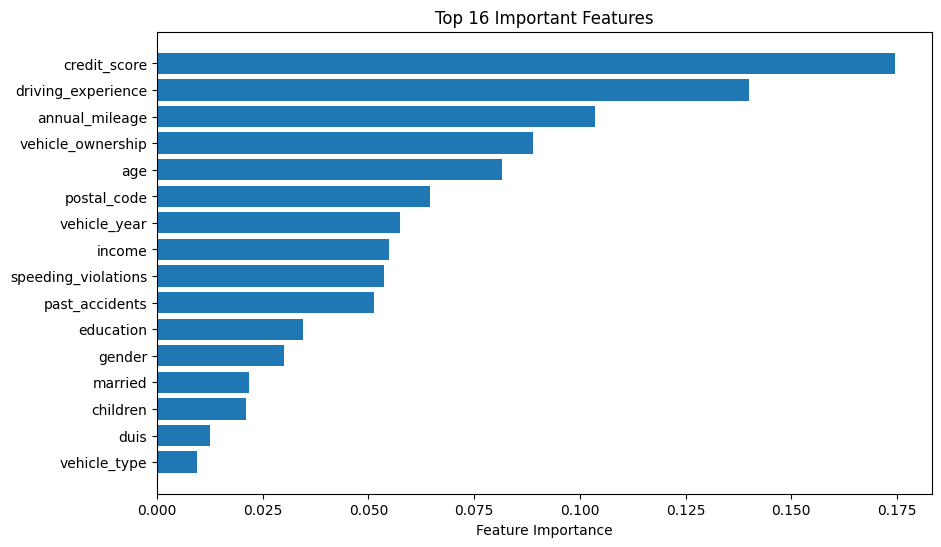

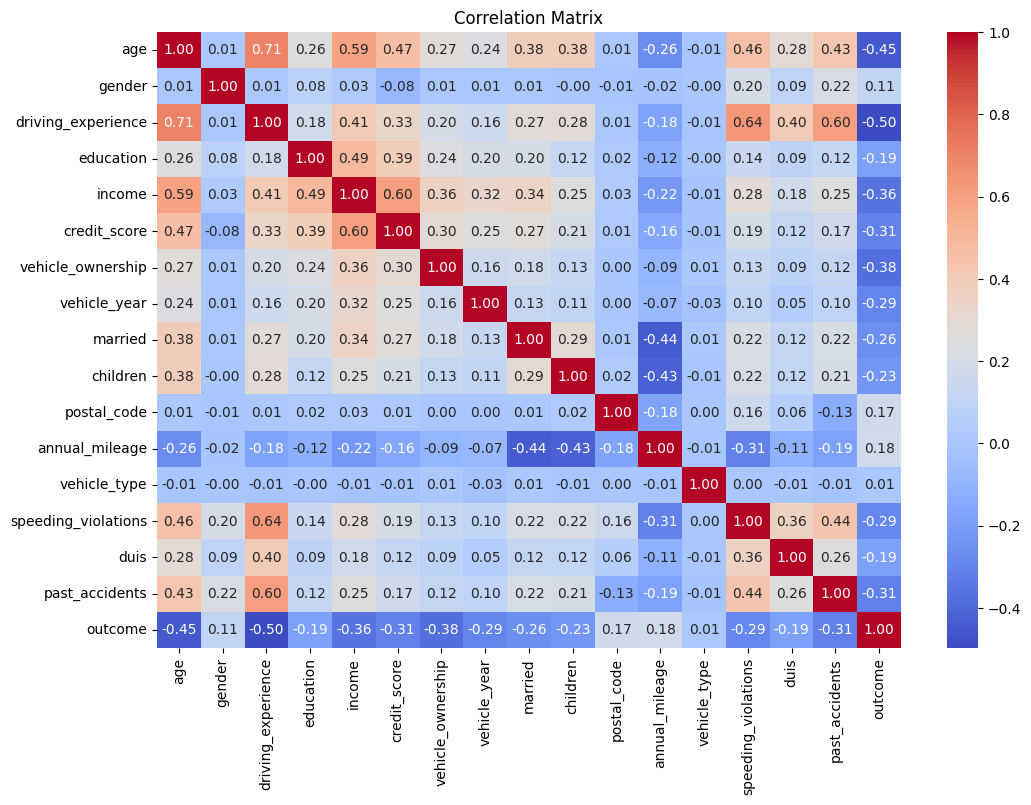

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assume df_ml is your DataFrame with 'outcome' as the target variable

# Separate features (X) and target variable (y)
X = df_ml.drop('outcome', axis=1)
y = df_ml['outcome']

# Perform feature selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top N important features
top_n = 10  # Change this number based on how many top features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top {} Important Features'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

print("\n")
# Calculate correlation matrix
correlation_matrix = df_ml.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Step 4: Apply Column Transformations**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define columns for preprocessing
numerical_features = ['credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']
categorical_features = ['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_ownership',
                        'vehicle_year', 'married', 'children', 'vehicle_type', 'postal_code']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations
X_preprocessed = preprocessor.fit_transform(df_ml)

# Capture transformed column names for categorical features
categorical_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and transformed categorical column names
all_column_names = numerical_features + list(categorical_columns)

# Convert NumPy array back to a DataFrame with correct column names
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_column_names)
display(X_preprocessed_df.head())
print(X_preprocessed_df.shape)

,credit_score,annual_mileage,speeding_violations,duis,past_accidents,age_1,age_2,age_3,gender_1,driving_experience_1,...,income_2,income_3,vehicle_ownership_1.0,vehicle_year_1,married_1.0,children_1.0,vehicle_type_1,postal_code_2,postal_code_3,postal_code_4
0,0.865914,0.113057,-0.661462,-0.43102,-0.639263,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.208879,1.605576,-0.661462,-0.43102,-0.639263,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.173367,-0.260073,-0.661462,-0.43102,-0.639263,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.369485,-0.260073,-0.661462,-0.43102,-0.639263,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.974770,0.113057,0.230657,-0.43102,-0.034072,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(10000, 25)


## **Step 5: Split Data and Train Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the DataFrame into features (X) and target (y)
X = X_preprocessed_df
y = df_ml['outcome']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8285
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1367
         1.0       0.77      0.66      0.71       633

    accuracy                           0.83      2000
   macro avg       0.81      0.78      0.79      2000
weighted avg       0.82      0.83      0.82      2000



## **Step 6: Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy after tuning:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy after tuning: 0.848
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1367
         1.0       0.78      0.72      0.75       633

    accuracy                           0.85      2000
   macro avg       0.83      0.81      0.82      2000
weighted avg       0.85      0.85      0.85      2000

